# Veri Bilimi Final Rapor

## 1. Proje Genel Açıklama 

### a) Neden bu problem seçildi ?
Bu problem, sağlık sigortası primlerinin tahmin edilmesi üzerine odaklanmaktadır. Bu konunun seçilme nedenleri şunlardır:

1. Güncel ve Önemli Bir Konu: Sağlık sigortası, hem bireyler hem de sigorta şirketleri için büyük önem taşımaktadır. Sağlık harcamalarının öngörülebilirliği ve planlanabilirliği, maliyetlerin kontrol altında tutulmasını sağlar. <br>

2. Veri Zenginliği: Sağlık sigortası primlerini etkileyen çok sayıda faktör bulunmaktadır. Bu da veri bilimi ve makine öğrenmesi tekniklerinin uygulanması için zengin bir veri seti sağlar. <br>

3. Kişiselleştirme: Bireylerin yaş, cinsiyet, vücut kitle indeksi (BMI), sigara kullanımı gibi kişisel özelliklerine göre primlerin belirlenmesi, daha adil ve doğru fiyatlandırma yapılmasını sağlar. <br>

4. Makine Öğrenmesi Uygulama Alanı: Sağlık sigortası primlerinin tahmin edilmesi, regresyon analizleri ve diğer makine öğrenmesi tekniklerinin uygulanması için uygun bir problemdir. Bu, öğrencilere ve veri bilimcilere teorik bilgilerini pratikte uygulama fırsatı sunar.


### b) Hangi yapay öğenme teknikleri uygulanacak ?
Projemde de veriler sürekli olduğu için 3 tane regresyon algoritmasını uygun  buldum. Bunlar ;
1. Lineer Regresyon (Linear Regression)
2. Karar Ağaçları (Decision Trees)
3. Rastgele Orman (Random Forest)


   Kısım 4' de ayrıntılı olarak bilgileir bulunmaktadır.

### c) Seçilen veri kümesi hakkında özet bilgi ?

Seçilen Dataset:https://www.kaggle.com/datasets/shivadumnawar/health-insurance-dataset 
Bu veri seti, sağlık sigortası primlerinin tahmini amacıyla kullanılır ve bireylerin demografik ve yaşam tarzı bilgilerini içerir. Sağlık sigortası primlerinin belirlenmesinde çeşitli faktörler rol oynar ve bu veri seti, bu faktörlerin etkilerini analiz etmek için kullanılabilir. 
Seçtiğim data seti toplamda 7 özellik ve 1338 tane inşan verisinden yani 
7 sütün 1338 satırdan oluşmaktadır.Veri setinde yer alan özellikler şunlardır: <br>
age ->	Sigortalının yaşı                ->	Tamsayı <br>
sex	-> Sigortalının cinsiyeti	        ->  Kategorik <br>
bmi	-> Vücut kitle indeksi (BMI)        ->	Sürekli Sayısal <br>
children ->	Sigortalının çocuk sayısı   ->	Tamsayı <br>
smoker   ->	Sigara içme durumu	        ->  Kategorik <br>
region   ->	Sigortalının yaşadığı bölge ->	Kategorik <br>
charges	 -> Sağlık sigortası primi	    ->Sürekli Sayısal <br>
Bu veri seti, sağlık sigortası primlerinin tahmin edilmesi için uygun ve kapsamlı bilgiler sunmaktadır. Bu bilgiler ışığında, makine öğrenmesi teknikleri kullanılarak bireylerin prim miktarlarının doğru bir şekilde tahmin edilmesi hedeflenmektedir.

## 2. Açıklayıcı Veri Analizi (Exploratory Data Analysis - EDA):

In [1]:
import pandas as pd
import random as rnd
import numpy as np
import math
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
Medicalpremium = pd.read_csv("Health_insurance.csv")#read csv file

In [3]:
Medicalpremium.head(7) # first 3 object caming to table

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960


In [4]:
Medicalpremium.shape #giving how many row and col information

(1338, 7)

In [5]:
Medicalpremium.info()# it's giving attributes' type info and how many value is non null info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
Medicalpremium.sample(7)#chosing 7 random obje from my data 

,age,sex,bmi,children,smoker,region,charges
699,23,female,39.270,2,no,southeast,3500.61230
1161,34,male,42.130,2,no,southeast,5124.18870
689,27,male,31.130,1,yes,southeast,34806.46770
185,36,male,41.895,3,yes,northeast,43753.33705
412,26,female,17.195,2,yes,northeast,14455.64405
399,18,female,38.170,0,no,southeast,1631.66830
139,22,female,36.000,0,no,southwest,2166.73200


In [7]:
Medicalpremium.columns# here is the attributes' names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
Medicalpremium.dtypes #dataset type  

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
Medicalpremium.values #Here is the all values inside in array.

array([[19, 'female', 27.9, ..., 'yes', 'southwest', 16884.924],
       [18, 'male', 33.77, ..., 'no', 'southeast', 1725.5523],
       [28, 'male', 33.0, ..., 'no', 'southeast', 4449.462],
       ...,
       [18, 'female', 36.85, ..., 'no', 'southeast', 1629.8335],
       [21, 'female', 25.8, ..., 'no', 'southwest', 2007.945],
       [61, 'female', 29.07, ..., 'yes', 'northwest', 29141.3603]],
      dtype=object)

In [10]:
Medicalpremium.region.unique() 

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
Medicalpremium.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [12]:
Medicalpremium.describe() #i can acsess five number summary for int values.In this way, I can learn about a lot of things from here, mean, median quartiles
#

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
Medicalpremium.isna().sum().sort_values(ascending=False) #here is calculated how many missing value are there .

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
# Apply value_counts() on column sex
sex = Medicalpremium['sex'].value_counts()
sex # how many male and female are they in my dataset? it is almost equal 

sex
male      676
female    662
Name: count, dtype: int64

In [15]:
# Apply value_counts() on column smoker
smoker = Medicalpremium['smoker'].value_counts()
smoker # How many people smoke ?   #that's nice non smoke people are less than  smoker people

smoker
no     1064
yes     274
Name: count, dtype: int64

In [16]:
# Apply value_counts() on column region
region = Medicalpremium['region'].value_counts()
region 

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [17]:
print("Mid-range for children:", ((Medicalpremium['children'].min() + Medicalpremium['children'].max()) / 2)) #Mid-range = (max+min)/2
print("Mid-range for charges:", ((Medicalpremium['charges'].min() + Medicalpremium['charges'].max()) / 2))
print("Mid-range for bmi:", ((Medicalpremium['bmi'].min() + Medicalpremium['bmi'].max()) / 2))
print("Mid-range for age:", ((Medicalpremium['age'].min() + Medicalpremium['age'].max()) / 2))

Mid-range for children: 2.5
Mid-range for charges: 32446.150955
Mid-range for bmi: 34.545
Mid-range for age: 41.0


In [18]:
print("Max-Min for children:", Medicalpremium['children'].max() - Medicalpremium['children'].min())
print("Max-Min for charges:", Medicalpremium['charges'].max() - Medicalpremium['charges'].min())
print("Max-Min for bmi:", Medicalpremium['bmi'].max() - Medicalpremium['bmi'].min())
print("Max-Min for age:", Medicalpremium['age'].max() - Medicalpremium['age'].min())

Max-Min for children: 5
Max-Min for charges: 62648.554110000005
Max-Min for bmi: 37.17
Max-Min for age: 46


In [19]:
# IQR=Q3-Q1
age= Medicalpremium['age'].quantile([0.25, 0.5, 0.75])
print(f"IQR for age: {age[0.75] - age[0.25]}")
children= Medicalpremium['children'].quantile([0.25, 0.5, 0.75])
print(f"IQR for children: {children[0.75] - children[0.25]}")
charges= Medicalpremium['charges'].quantile([0.25, 0.5, 0.75])
print(f"IQR for charges: {charges[0.75] - charges[0.25]}")
bmi= Medicalpremium['bmi'].quantile([0.25, 0.5, 0.75])
print(f"IQR for bmi: {bmi[0.75] - bmi[0.25]}")

IQR for age: 24.0
IQR for children: 2.0
IQR for charges: 11899.625365
IQR for bmi: 8.3975


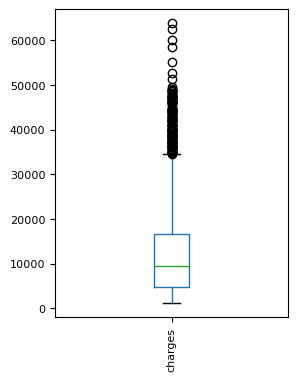

In [20]:
#boxplot = Medicalpremium.boxplot(column=['age'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)
#boxplot2 = Medicalpremium.boxplot(column=['children'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)
#boxplot3 = Medicalpremium.boxplot(column=['bmi'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)
boxplot3 = Medicalpremium.boxplot(column=['charges'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)


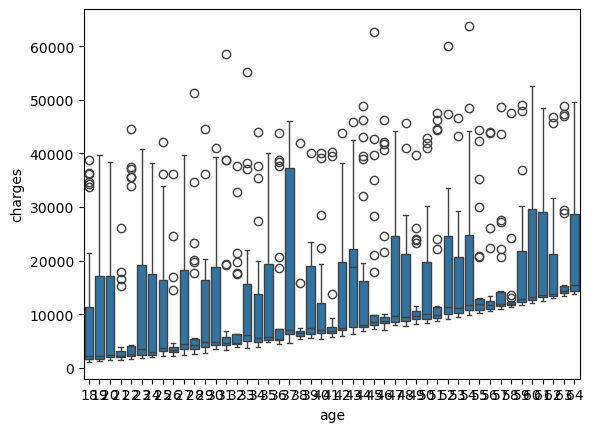

In [21]:
sns.boxplot( x=Medicalpremium["age"], y=Medicalpremium["charges"] ) 
plt.show()

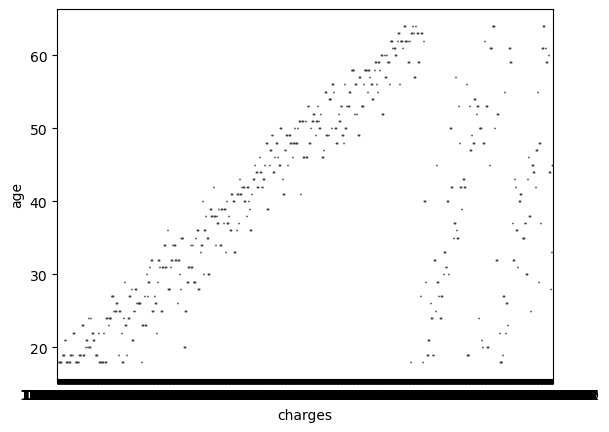

In [22]:
sns.boxplot( x=Medicalpremium["charges"], y=Medicalpremium["age"] )   #çok değişik bir şey oldu anlamadım.
plt.show()

In [23]:
for kolon in Medicalpremium.columns[1:]:
    if Medicalpremium[kolon].dtype == 'float64':
        print(f"Variance of {kolon} :{Medicalpremium[kolon].var()}")
for kolon in Medicalpremium.columns[1:]:
    if Medicalpremium[kolon].dtype == 'int64':
        print(f"Variance of {kolon} :{Medicalpremium[kolon].var()}")

Variance of bmi :37.187883609773266
Variance of charges :146652372.1528548
Variance of children :1.4532127456668944


In [24]:

for kolon in Medicalpremium.columns[1:]:
    if Medicalpremium[kolon].dtype == 'float64':
        print(f"Std of {kolon} : {Medicalpremium[kolon].std()}")
for kolon in Medicalpremium.columns[1:]:
    if Medicalpremium[kolon].dtype == 'int64':
        print(f"Std of {kolon} : {Medicalpremium[kolon].std()}")

Std of bmi : 6.098186911679017
Std of charges : 12110.011236693994
Std of children : 1.2054927397819095


In [25]:
import matplotlib.pyplot as plt
Medicalpremium['charges'].plot(kind='hist',bins=5)

<Axes: ylabel='Frequency'>

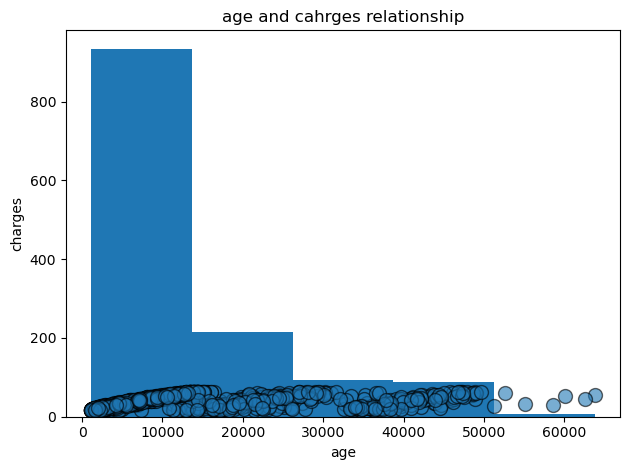

In [26]:
view_count = Medicalpremium['charges']
x = Medicalpremium['age']
plt.scatter(view_count, x, s=100, alpha=0.6, edgecolor='black', linewidth=1)

plt.title('age and cahrges relationship')
plt.xlabel('age')
plt.ylabel('charges')

plt.tight_layout()
plt.show()


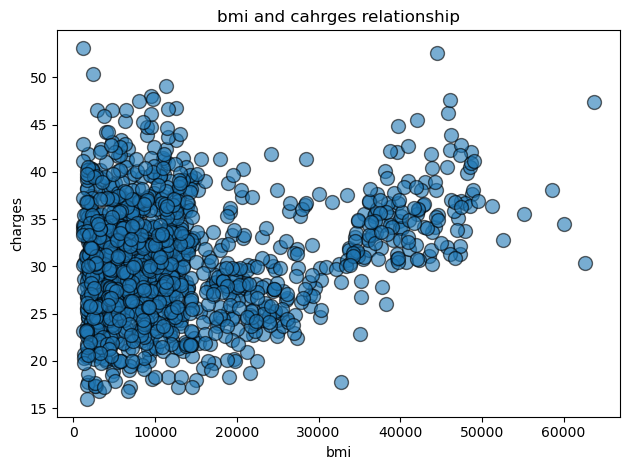

In [27]:
view_count = Medicalpremium['charges']
x = Medicalpremium['bmi']
plt.scatter(view_count, x, s=100, alpha=0.6, edgecolor='black', linewidth=1)

plt.title('bmi and cahrges relationship')
plt.xlabel('bmi')
plt.ylabel('charges')

plt.tight_layout()
plt.show()

In [28]:
categoric=[x for x in Medicalpremium.columns if Medicalpremium[x].dtypes=='object'] 
categoric

['sex', 'smoker', 'region']

In [29]:
numeric=[y for y in Medicalpremium.columns if Medicalpremium[y].dtypes!='object']
numeric

['age', 'bmi', 'children', 'charges']

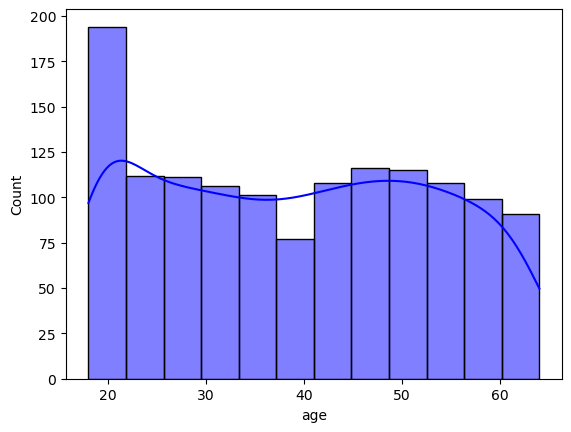

In [30]:
sns.histplot(Medicalpremium, x='age', kde=True, color="b")
#Also i can draw all numeric columns graph like this and i can commend their shape of disrubition
plt.show()

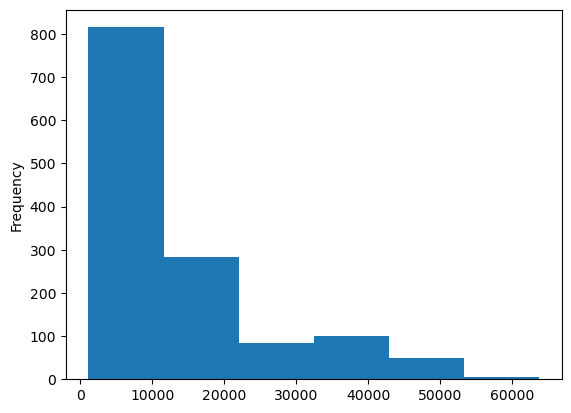

In [31]:
import matplotlib.pyplot as plt
Medicalpremium['charges'].plot(kind='hist',bins=6)
# when i look at this table it's right skewed.
plt.show()

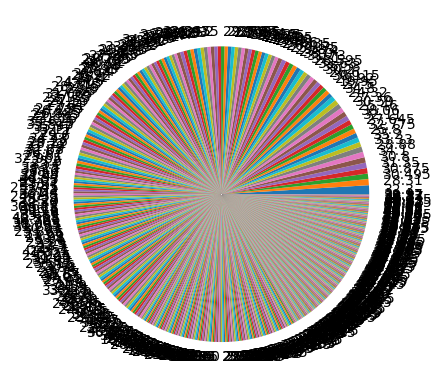

In [32]:
Medicalpremium['bmi'].value_counts().plot.pie()# in my dataset users are mostly Mariied
plt.show()

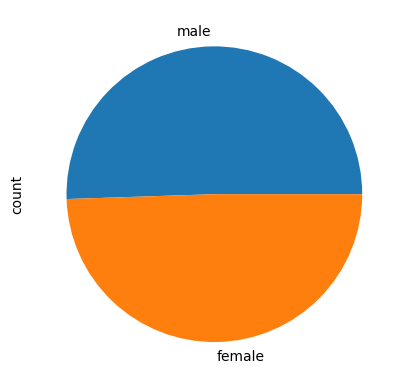

In [33]:
Medicalpremium['sex'].value_counts().plot.pie()
plt.show()
#When i look at the graph there are it's seems %50 male %50 female but i will check the exact count 

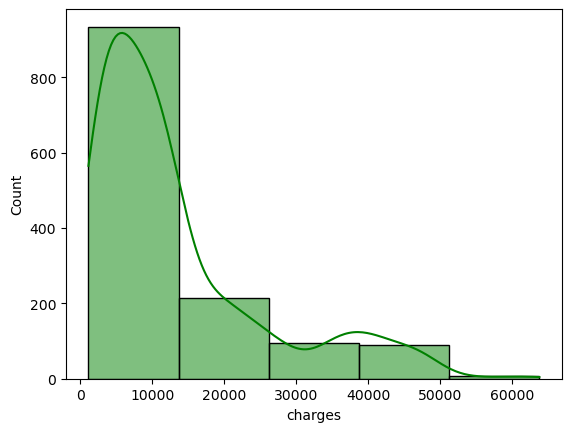

In [34]:
sns.histplot(Medicalpremium, x='charges',bins=5, kde=True, color="g") 
t=Medicalpremium['charges'].mean()
l=Medicalpremium['charges'].mode()
plt.show()
#l>t so that mode bigger than mean.left skewed 

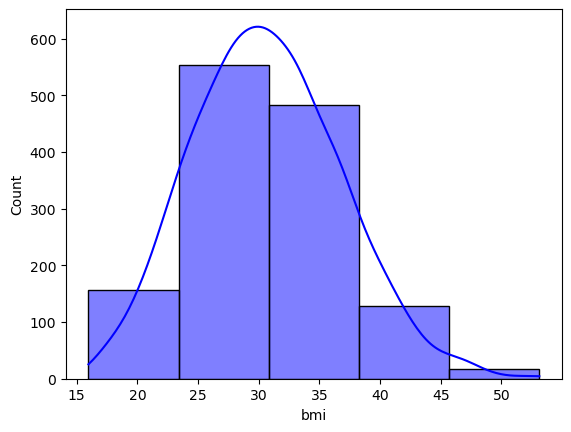

In [35]:
sns.histplot(Medicalpremium, x='bmi',bins=5, kde=True, color="b")
plt.show()


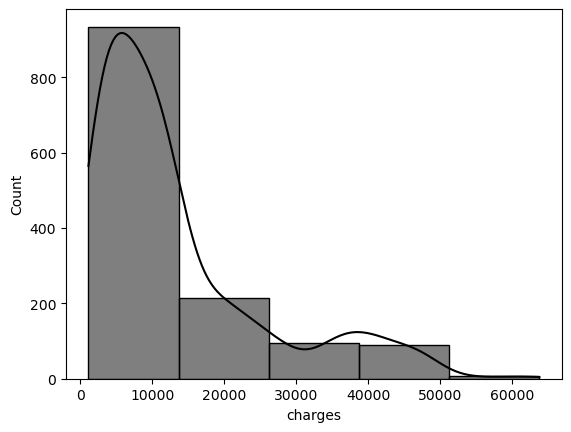

In [36]:
sns.histplot(Medicalpremium, x='charges',bins=5, kde=True, color="k") #left skewd
plt.show()

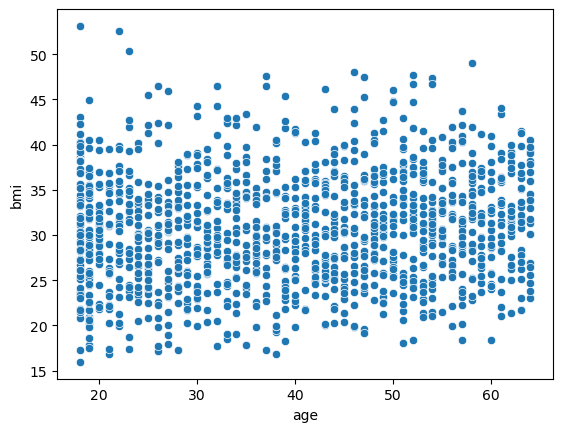

In [37]:
island=list(Medicalpremium.groupby('charges'))

sns.scatterplot(data=Medicalpremium, x = 'age', y = 'bmi')
plt.show()


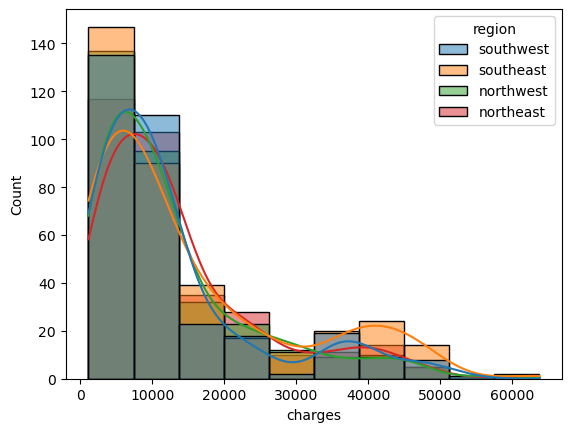

In [38]:
sns.histplot(data=Medicalpremium, x='charges', hue='region',bins=10, kde=True, color="m")
plt.show()

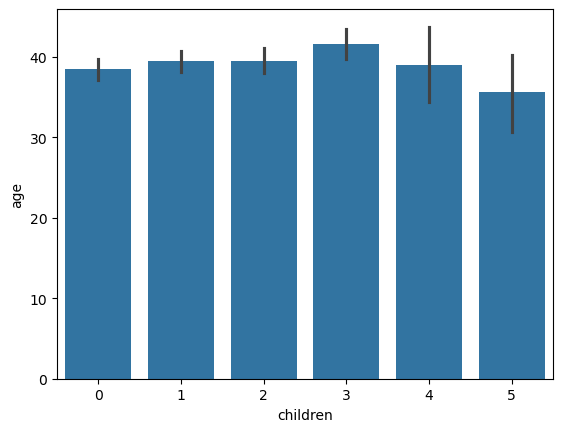

In [39]:
sns.barplot(data=Medicalpremium, x='children', y='age')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2424\388446947.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Medicalpremium,x='children', palette="ch:.25")


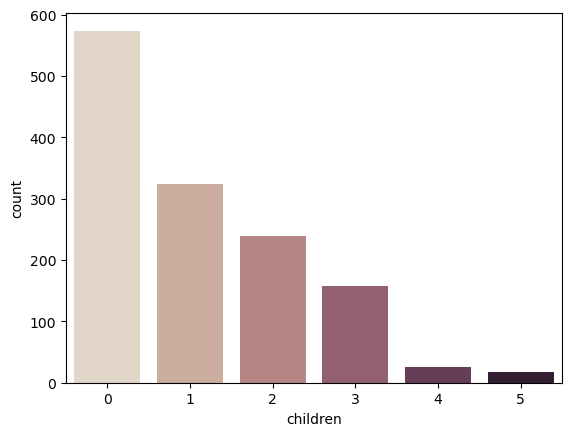

In [40]:
sns.countplot(data=Medicalpremium,x='children', palette="ch:.25")
plt.show()

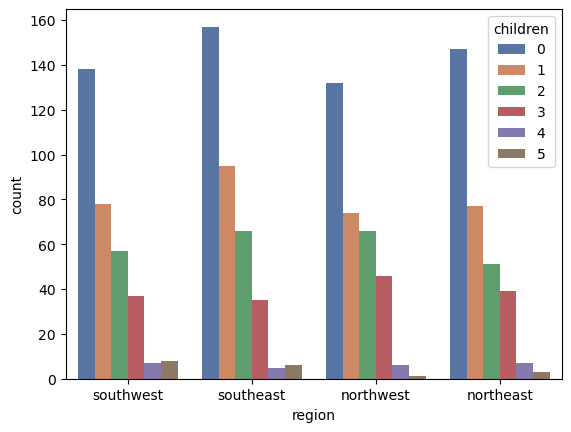

In [41]:
sns.countplot(data=Medicalpremium,x='region', hue='children', palette='deep')
plt.show()

In [42]:
Medicalpremium.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(10, 20), markersize=1);

In [43]:
Medicalpremium['region'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

## 3. Veri Ön İşleme

#### a) Eğer kayıp  Value var ise yok etme yöntemlerinden uygun olan ile sil
Count of missing values:<br>
age            0<br>
sex            0<br>
bmi            0<br>
children       0<br>
smoker      0<br>
region       0<br>
charges        0<br>

Benim verisetimde kayıp veri yok ama olsaydı eğer ortalama varyans veya silme yöntemlerinden uygun olanı düşünüp kayıp veriyi temizlerdim.

In [44]:
new_data_copy = Medicalpremium.copy()

# in here , i crate a new database which name is new_data_copy .Cause of i don't want to change my main data to compare with new data.
#Also, i remove the  outliers from bmi.and i check again, all outliers are removed


In [45]:
new_data_copy.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [46]:
new_data_copy.isna().sum().sort_values(ascending=False)#i am checking is there any missing value.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [47]:
na_counts = Medicalpremium.isna().sum()
na_counts # yok

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### b) Geçersiz özellikleri tekrar isimlendir

In [48]:
Medicalpremium.head(5) #the columns' names are valid names there is no need to change 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### c) Outliers var mı? Var ise sil. 2 farklı yöntem ile
#### d) uç değerlerin ne olduğu ve hangi işlemler ile yok edildiğini açıkla

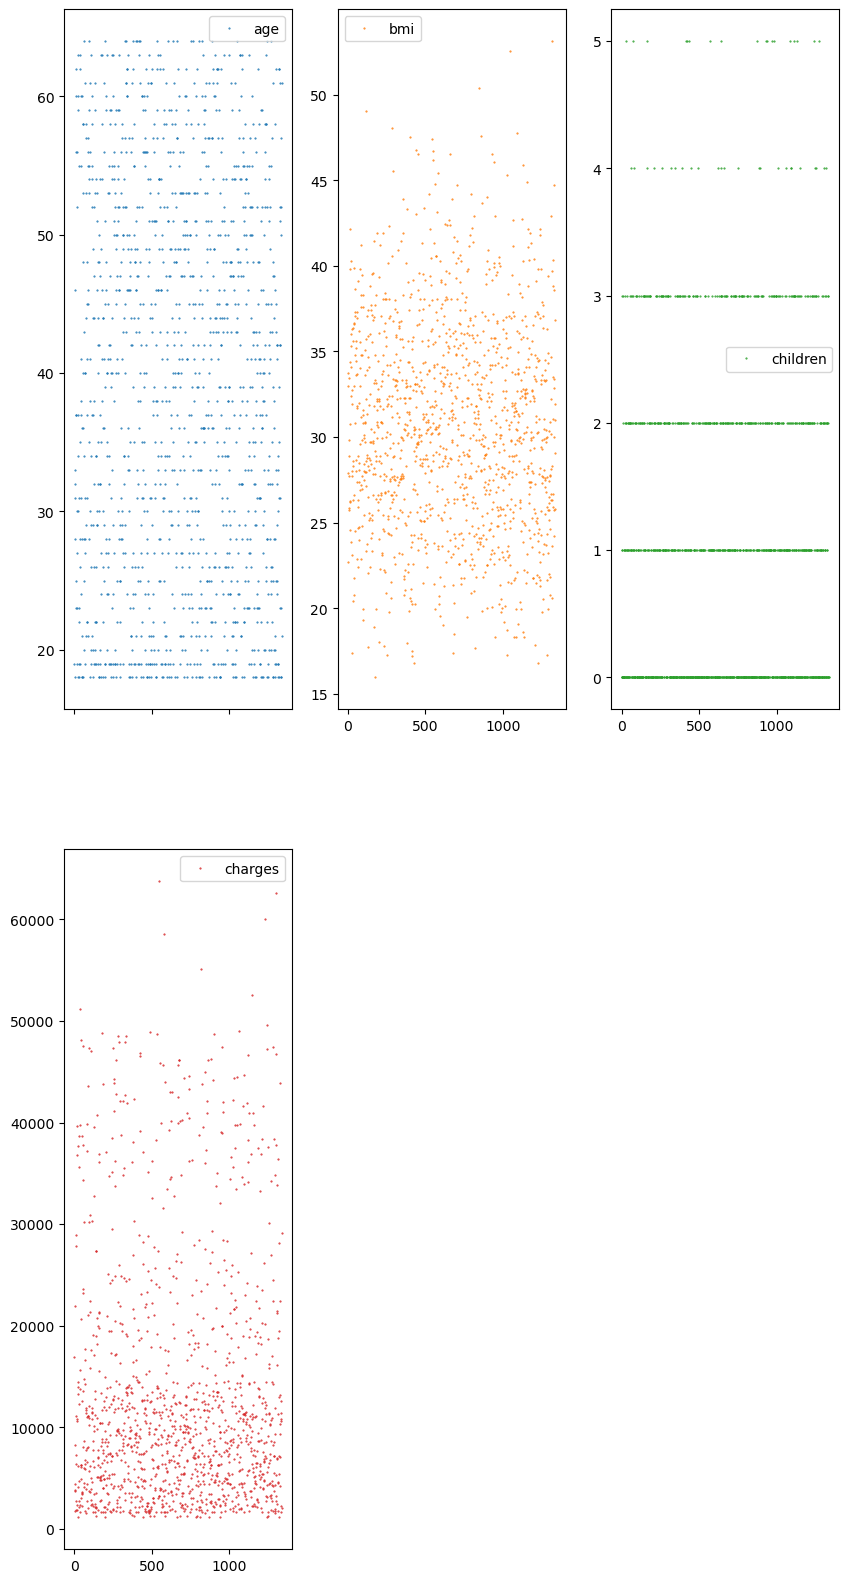

In [49]:
boxplot = new_data_copy.boxplot(figsize = (3,4), rot = 90, fontsize= '8', grid = True)
plt.show()

Bu kodda, bmi sütunundaki uç değerler, interquartile range (IQR) yöntemini kullanarak tespit edilmiş ve uç değerlerin yerine belirli bir sınır değeri atanmıştır. İşlem adımları şu şekildedir:

İlk çeyrek (Q1) ve üçüncü çeyrek (Q3) değerlerini hesaplamak için quantile fonksiyonu kullanılmıştır.
IQR, Q3 - Q1 olarak hesaplanmıştır.
Uç değer sınırı (üst sınır) Q3 + 1.5 * IQR olarak belirlenmiştir.
np.where fonksiyonu kullanılarak, bmi sütunundaki değerlerin bu sınırdan büyük olup olmadığını kontrol eder ve sınırdan büyük olan değerleri bu sınır değeri ile değiştirir.
Bu yöntem, uç değerlerin tamamen silinmesi yerine, uç değerlerin belirli bir sınır değerine ayarlanması işlemini gerçekleştirmektedir.
Bu yöntem, uç değerlerin (outliers) yerine üst sınır değeri atanarak, veri kümesindeki uç değerlerin etkisini azaltır. Uç değerleri tamamen kaldırmak yerine, belirli bir sınır değeri ile değiştirilir ve böylece veri kümesinin istatistiksel dağılımı korunur. Bu, özellikle analizlerde ve modellerde uç değerlerin aşırı etkisini önlemek amacıyla kullanılan bir yöntemdir.

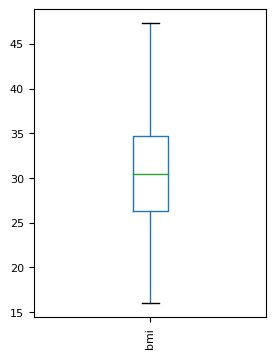

In [50]:
import numpy as np

bmi_quantiles = Medicalpremium['bmi'].quantile([0.25, 0.5, 0.75])

q1 = bmi_quantiles.loc[0.25]
q3 = bmi_quantiles.loc[0.75]

iqr = q3 - q1

a = q3 + 1.5 * iqr

new_data_copy['bmi'] = np.where(new_data_copy['bmi'] > a, a, new_data_copy['bmi'])

boxplot = new_data_copy.boxplot(column=['bmi'], figsize=(3, 4), rot=90, fontsize=8, grid=False)

plt.show()
#all of them had been remove from new dataset.

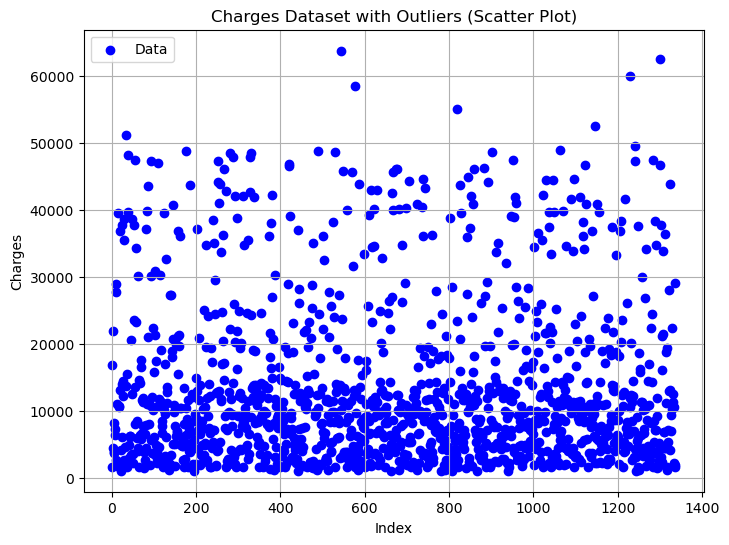

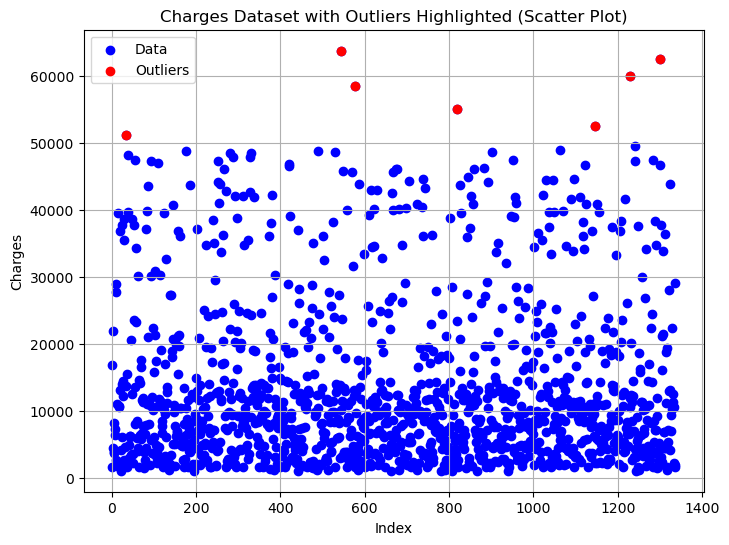

Original data shape: (1338, 7)
Cleaned data shape: (1331, 7)


In [51]:
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Scatter plot ile outliers'ları göster
plt.figure(figsize=(8, 6))
plt.scatter(new_data_copy.index, new_data_copy['charges'], color='blue', label='Data')
plt.title('Charges Dataset with Outliers (Scatter Plot)')
plt.xlabel('Index')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

# Z-skorunu hesaplayarak outliers'ları belirleme
z_scores = zscore(new_data_copy['charges'])
outliers_mask = (z_scores < -3) | (z_scores > 3)

# Scatter plot üzerinde uç noktaları gösterme
plt.figure(figsize=(8, 6))
plt.scatter(new_data_copy.index, new_data_copy['charges'], color='blue', label='Data')
plt.scatter(new_data_copy.index[outliers_mask], new_data_copy['charges'][outliers_mask], color='red', label='Outliers')
plt.title('Charges Dataset with Outliers Highlighted (Scatter Plot)')
plt.xlabel('Index')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()
cleaned_data = new_data_copy
# Outliers'ları veri setinden çıkararak temizlenmiş veri kümesi oluşturma
new_data_copy = new_data_copy[~outliers_mask]

print("Original data shape:", cleaned_data.shape)
print("Cleaned data shape:", new_data_copy.shape)


Bu yöntem, veri kümesindeki uç değerlerin tespit edilip, görselleştirilip, veri kümesinden çıkarılması sürecini içerir. Z-score yöntemi, uç değerleri tespit etmede yaygın olarak kullanılan bir yöntemdir ve bu adımlar, veri analizinde sıkça uygulanan bir süreçtir. Bu yöntemle, veri kümesindeki uç değerlerin etkisi azaltılır ve daha güvenilir analizler yapılabilir.

In [52]:
new_data_copy['sex'] = new_data_copy['sex'].map({'female': 0, 'male': 1})


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2424\2070121901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_copy['sex'] = new_data_copy['sex'].map({'female': 0, 'male': 1})


In [53]:
new_data_copy['region'] = new_data_copy['region'].map({'southwest': 1, 'northwest': 2, 'southeast': 3, 'northeast':4 })


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2424\1142315367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_copy['region'] = new_data_copy['region'].map({'southwest': 1, 'northwest': 2, 'southeast': 3, 'northeast':4 })


In [54]:
new_data_copy['smoker'] = new_data_copy['smoker'].map({'no': 0, 'yes': 1})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2424\143809225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_copy['smoker'] = new_data_copy['smoker'].map({'no': 0, 'yes': 1})


In [55]:
new_data_copy.sex.unique 

<bound method Series.unique of 0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1331, dtype: int64>

In [56]:
new_data_copy.region.unique 

<bound method Series.unique of 0       1
1       3
2       3
3       2
4       2
       ..
1333    2
1334    4
1335    3
1336    1
1337    2
Name: region, Length: 1331, dtype: int64>

In [57]:
new_data_copy.smoker.unique

<bound method Series.unique of 0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1331, dtype: int64>

In [58]:
display(new_data_copy.dtypes)

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [59]:

# i am converting bmi type float to int because all of them int.it's more make sense.
new_data_copy['bmi'] = new_data_copy['bmi'].astype(int)

display(new_data_copy.dtypes)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2424\3026841865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_copy['bmi'] = new_data_copy['bmi'].astype(int)


age           int64
sex           int64
bmi           int32
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

#### d) Özellikler arası ilişkiyi inceleme ve çıkarım yapma

In [60]:
corelation = new_data_copy.corr() #it,s the corralation matrix to see corelation with features between each other.
corelation

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.022425,0.110199,0.043197,-0.028377,-0.005716,0.304561
sex,-0.022425,1.000000,0.047594,0.016042,0.075786,0.009732,0.057519
bmi,0.110199,0.047594,1.000000,0.014144,-0.008874,0.001854,0.185410
children,0.043197,0.016042,0.014144,1.000000,0.011084,-0.035759,0.076993
smoker,-0.028377,0.075786,-0.008874,0.011084,1.000000,0.046852,0.785617
region,-0.005716,0.009732,0.001854,-0.035759,0.046852,1.000000,0.056311
charges,0.304561,0.057519,0.185410,0.076993,0.785617,0.056311,1.000000


In [61]:
covariance=new_data_copy.cov()
covariance

,age,sex,bmi,children,smoker,region,charges
age,197.627942,-0.157674,9.403627,0.732377,-0.159811,-0.088811,5.009109e+04
sex,-0.157674,0.250164,0.144496,0.009677,0.015185,0.005380,3.365796e+02
bmi,9.403627,0.144496,36.845710,0.103547,-0.021580,0.012435,1.316705e+04
children,0.732377,0.009677,0.103547,1.454509,0.005355,-0.047662,1.086355e+03
smoker,-0.159811,0.015185,-0.021580,0.005355,0.160481,0.020743,3.682006e+03
region,-0.088811,0.005380,0.012435,-0.047662,0.020743,1.221402,7.280909e+02
charges,50091.094695,336.579610,13167.045205,1086.354663,3682.005903,728.090889,1.368750e+08


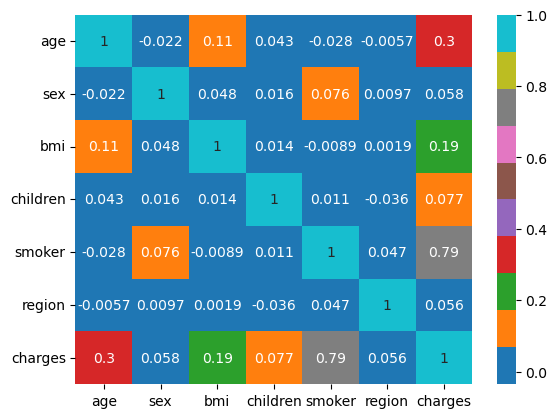

In [62]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True, cmap=sns.color_palette( as_cmap=True))
plt.show()
# the corelation between smoker and charges is most.Secondly age and charges. that makes sense but when i look at big schema corelation is less.

In [63]:
new_data_copy.corr().abs()["charges"].nlargest(11) #the order highest corelation between Purchased_Bike and another features

charges     1.000000
smoker      0.785617
age         0.304561
bmi         0.185410
children    0.076993
sex         0.057519
region      0.056311
Name: charges, dtype: float64

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


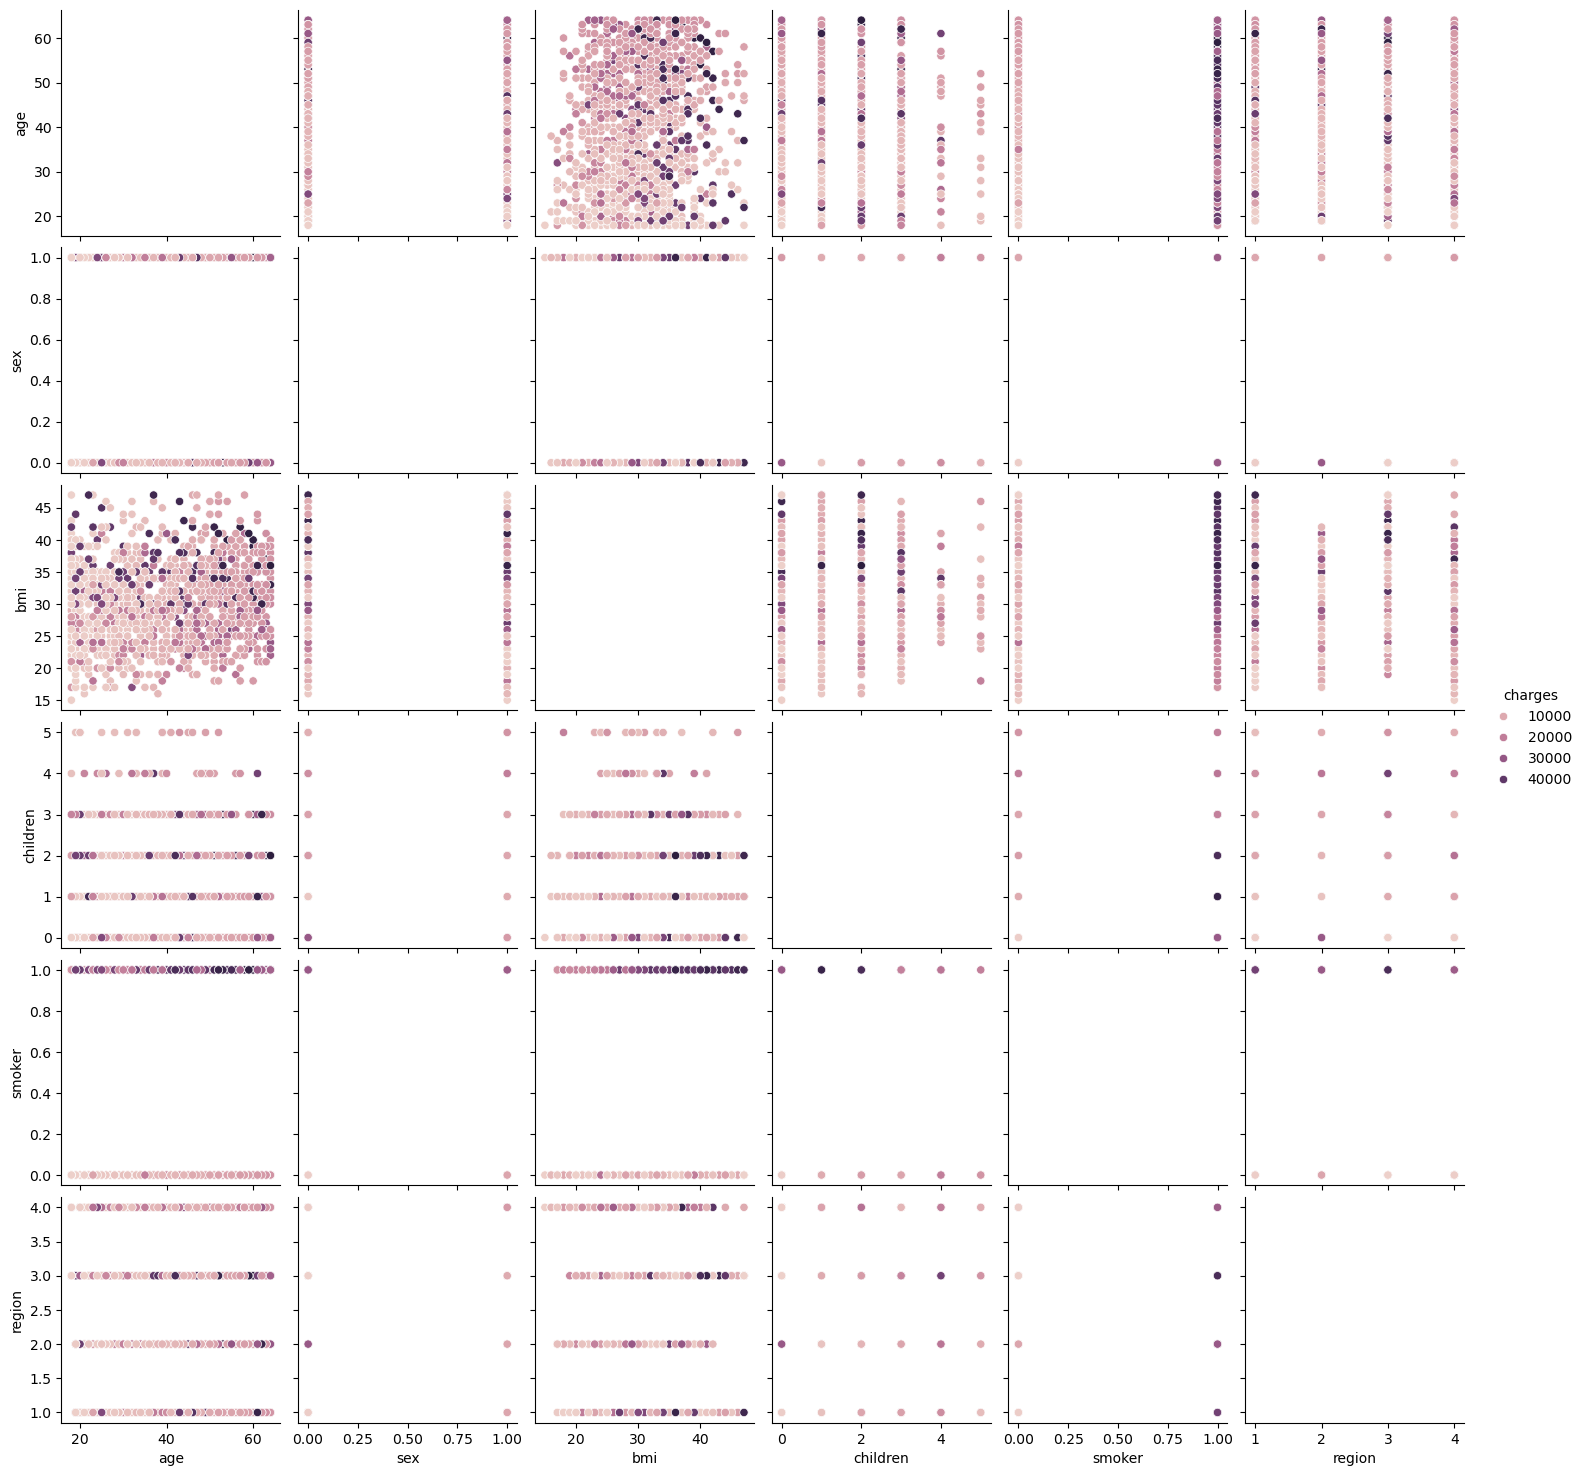

In [64]:
sns.pairplot(data=new_data_copy, hue='charges')# This is showing scatter plot of all features between charges
plt.show()
#When i look at this matrix there is no corelattion between columns.

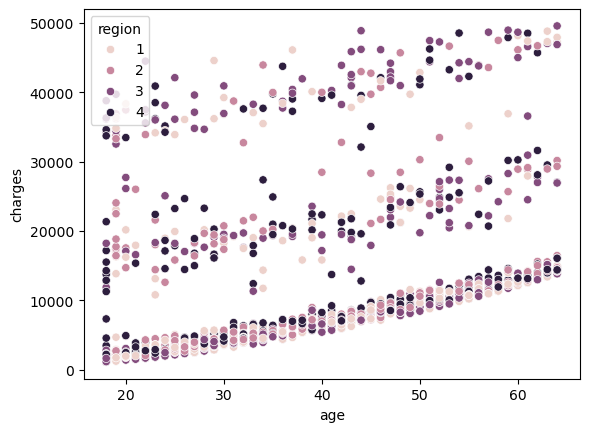

In [65]:
species = list(new_data_copy.groupby('region'))
sns.scatterplot(data = new_data_copy, x = 'age', y = 'charges', hue='region')
plt.show()


In [66]:
# Aim: is there any relation cjhildren   and smoker ?
dd = pd.crosstab(new_data_copy['children'], new_data_copy['smoker'], margins=True)
dd
#True False Table.

smoker,0,1,All
children,,,
0,459,111,570
1,263,59,322
2,185,55,240
3,118,38,156
4,22,3,25
5,17,1,18
All,1064,267,1331


 In my dataset there is only one person smoke which have 5 kid. And there are 115 person smoke which have no kid . I can comment this two sides; <br>
     One of them ; More kids is more expensive so that there is no money for cigarette<br>
     Another is that; More kids is happenies so they don't want to smoke 

In [67]:

# Initialize expected frequencies matrix
e = np.zeros((6, 2))
summ = dd.loc['All', 'All']
rows = dd.index[:-1]  # Exclude the 'All' row
cols = dd.columns[:-1]  # Exclude the 'All' column

# Calculate expected frequencies
for i in range(len(rows)):
    for j in range(len(cols)):
        e[i, j] = (dd.loc['All', cols[j]] * dd.loc[rows[i], 'All']) / summ

# Convert real frequencies to numpy array
real = pd.crosstab(new_data_copy['children'], new_data_copy['smoker']).to_numpy()

# Chi-square calculation
chi_square = np.sum((real - e)**2 / e)
print(chi_square)

7.121465423990419


In [68]:
from scipy.stats import chi2

# Chi-kare istatistiği
chi_square_statistic =6.887719904947631

# Serbestlik derecesi
degrees_of_freedom = 1  # Örneğin, iki kategorik değişken olduğunda, serbestlik derecesi kategori sayısının bir eksikliğidir.

# P-değeri
p_value = 1 - chi2.cdf(chi_square_statistic, degrees_of_freedom)

print("P-değer:", p_value)


P-değer: 0.008678990332652958


Calculated p-value: 0.0087

Since 0.0087 is less than 0.05, you reject the null hypothesi
there is no relations.

In [69]:
new_data_copy.groupby(['sex', 'smoker']).size().unstack(fill_value=0)

smoker,0,1
sex,,
0,547,112
1,517,155


In [70]:
new_data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27,0,1,1,16884.92400
1,18,1,33,1,0,3,1725.55230
2,28,1,33,3,0,3,4449.46200
3,33,1,22,0,0,2,21984.47061
4,32,1,28,0,0,2,3866.85520


In [71]:
s=new_data_copy[new_data_copy['age']<30]
print("Count of YOUNG people in belong this region ", s["region"].value_counts())

Count of YOUNG people in belong this region  region
3    115
2    102
4    101
1     98
Name: count, dtype: int64


In [72]:
j=new_data_copy[new_data_copy['age']>50]
print("Count of OLD people  in belong this region", j["region"].value_counts())

Count of OLD people  in belong this region region
3    93
4    87
1    87
2    86
Name: count, dtype: int64


#### e)  dimensionality reduction  yapmak benim datasetim için mantıklı değil 

In [73]:
# if there are high corelation between any columns i can remove one of them but in my dataset corellation is very less or there is no exit


sample=new_data_copy.sample(20)#i can test my algorithm in this sample
sample

##  4. Makine Öğrenmesi Algoritması


Seçtiğim algoritmalar sırası ile Lineer Regresyon, Decision Tree ve Random Forest . Bu üç algoritma , sigorta primlerinin tahmin edilmesi için uygun ve etkili seçeneklerdir. Lineer regresyon, basit ve yorumlanabilir bir model sağlarken, karar ağaçları ve random forest daha karmaşık ilişkileri modellemek ve daha yüksek tahmin doğruluğu elde etmek için kullanılabilir.

## 1. Lineer Regresyon: 

Neden Seçildi; Lineer regresyon, bağımlı değişken ile bağımsız değişkenler arasındaki lineer ilişkiyi modellemek için kullanılır. "Charges" (primler) sürekli bir değişken olduğundan, lineer regresyon modeli bu tahmini yapmak için uygun bir seçenektir

Ne İşe Yarar: Lineer regresyon, veri setindeki değişkenler arasındaki ilişkiyi anlamak ve bir değişkenin diğerlerini nasıl etkilediğini belirlemek için kullanışlıdır. Bu durumda, sigorta primlerini hangi faktörlerin belirlediğini anlamak için lineer regresyon modeli uygun olabilbir lineer regresyon bir supervised learning algoritmasmasıdır. 

### Avantajları:

Basitlik: Lineer regresyon oldukça basit ve anlaşılması kolay bir modeldir. Yorumlaması ve açıklanması kolaydır.

Hız: Hesaplama süresi genellikle hızlıdır, bu da büyük veri setleriyle çalışırken avantaj sağlar.

Az parametre: Modelin yapılandırılması için az sayıda parametre gerektirir.

### Dezavantajları:

Doğrusal İlişki: Lineer regresyon, bağımsız ve bağımlı değişkenler arasında doğrusal bir ilişki varsayar. Bu varsayım geçerli değilse model performansı düşer.

Outlier'lara Hassasiyet: Veri setindeki aykırı değerler modelin performansını olumsuz etkileyebilir.

Feature Interactions: Değişkenler arasındaki etkileşimleri iyi yakalayamaz.

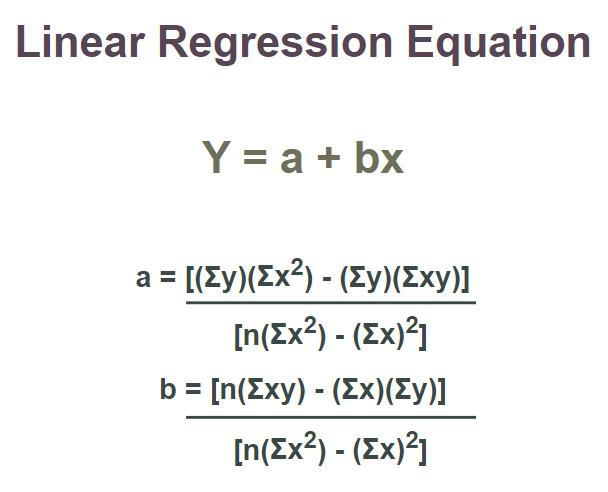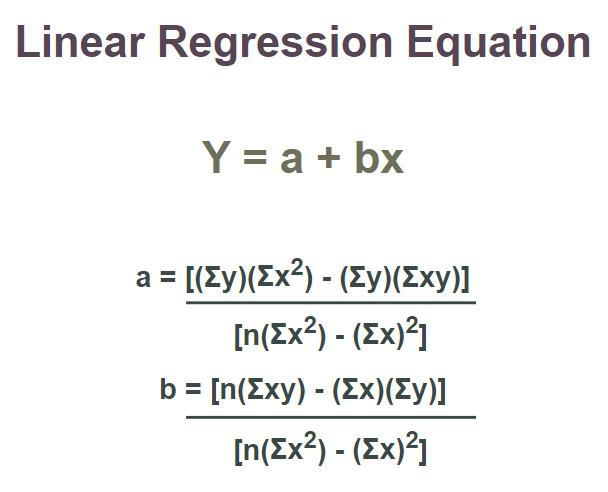

 ## 2. Karar Ağaçları (Decision Trees):

Neden Seçildi: Karar ağaçları, veri setini bir dizi karar kuralıyla bölerek ve ardışık kararlar alarak çalışan bir sınıflandırma veya regresyon tekniğidir. Bu durumda, veri setinizin içerdiği kategorik ve sürekli sayısal değişkenler arasındaki ilişkileri belirlemek için uygun olabilir.

Ne İşe Yarar: Karar ağaçları, veri setindeki değişkenler arasındaki ilişkileri anlamak ve bu ilişkileri kullanarak yeni veri noktaları için tahminler yapmak için kullanılqbilirç, karar ağaçları da supervised learning algoritmalarındandır.

### Avantajları:

Basit Yorumlama: Karar ağaçları genellikle grafiksel olarak temsil edilebilir ve kolayca yorumlanabilir.

Non-lineer İlişkiler: Doğrusal olmayan ilişkileri modelleyebilir.

Özellik Seçimi: Model, önemli özellikleri seçmede etkilidir ve gereksiz özellikleri eler.

### Dezavantajları:

Overfitting: Karar ağaçları, özellikle derin ağaçlar, aşırı uyum gösterme eğilimindedir. Bu da modelin genel performansını olumsuz etkileyebilir.

Dengesizlik: Dengesiz veri setlerinde performansı düşük olabilir.

Kararsızlık: Küçük veri değişiklikleri ağaç yapısında büyük değişikliklere neden olabilir.

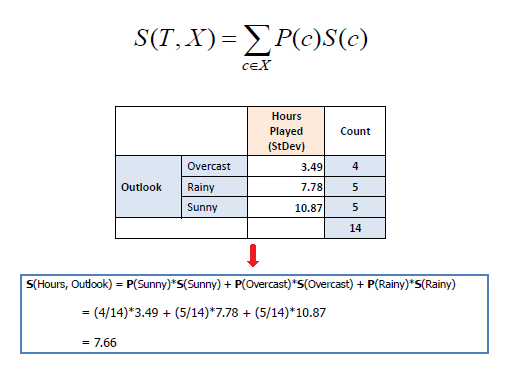

## 3. Random Forest:

Neden Seçildi: Random forest, birçok karar ağacının bir araya getirilmiş hali olan bir topluluk tabanlı öğrenme yöntemidir. Bu nedenle, karar ağaçlarının avantajlarını (örneğin, overfitting'e karşı dirençlilik) bir araya getirirken, aynı zamanda tek bir karar ağacının zayıf yönlerini de azaltır.

Ne İşe Yarar: Random forest, karar ağaçlarının sunduğu esneklik ve yüksek performansı korurken, aynı zamanda overfitting riskini azaltır. Bu nedenle, veri setinizde karmaşık ilişkiler varsa ve karar ağaçları tek başına yetersiz kalıyorsa, random forest modeli daha iyi bir seçenek olabilir. random forest da supervised learning algoritmalarından biridi### r.

Avantajları:

Genel Performans: Rastgele ormanlar, karar ağaçlarının oluşturduğu ormanlardan oluşur ve genellikle daha iyi genel performans sağlar.

Overfitting Azaltma: Birden çok ağaç kullanarak overfitting sorununu azaltır.

Özellik Seçimi ve Önem Sıralaması: Rastgele ormanlar, hangi özelliklerin daha önemli olduğunu belirlemede ### etkilidir.

Dezavantajları:

Hesaplama Maliyeti: Rastgele ormanlar, birden çok karar ağacı oluşturduğu için hesaplama ve bellek açısından maliyetlidir.

Yorumlama Zorluğu: Tek bir karar ağacına göre daha karmaşık ve yorumlaması daha zordur.

Parametre Ayarlamaları: Hyperparametre ayarlamaları (ağaç sayısı, maksimum derinlik vb.) model performansını etkileyebilir ve bu ayarlamaların optimizasyonu zaman alabilir.

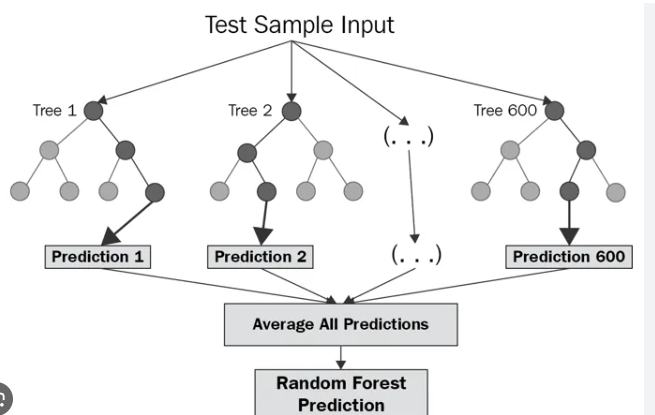

## Algoritma  Kodları;

Aşşağıdaki kısımda datamı train ve teste bölüyorum bu aşamada bizim predict etmek istediğimiz sutun "charges" olduğu için o sutunu ,labeli y için ayırıyorum

In [74]:
from sklearn.model_selection import train_test_split

X = new_data_copy.drop('charges', axis=1)
y = new_data_copy['charges']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Aşşağıdaki evulate model performans değerlendirmek için gerekli metriklerin hesaplandığı bir fonksiyondur. Bunu ayrıca algoritmaları entegre etmeden bir kere yaptım ki aynı fonksiyon ile evulate edilerek değerlendirilsinler.

In [75]:
# Performans değerlendirme fonksiyonu
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2, y_pred

### 1. Mean Absolute Error (MAE)
   
#### Tanım:

MAE, tahmin edilen değerler ile gerçek değerler arasındaki mutlak farkların ortalamasıdır. Her bir tahmin hatasının büyüklüğünü (mutlak değerde) alarak bunların ortalamasını hesaplar. Hataların yönünü dikkate almaz, sadece büyüklüğünü ölçMAE, modelin yaptığı hataların ortalama büyüklüğünü gösterir ve hataların her birinin eşit ağırlığa sahip olduğunu varsayar.

#### Formülr.


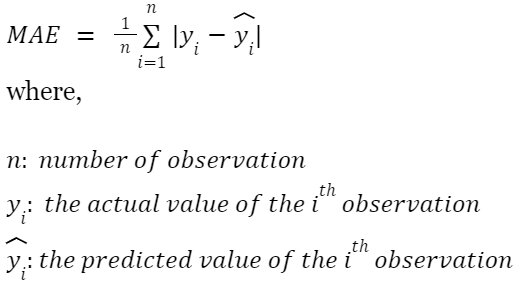

### 2. Mean Squared Error (MSE)

#### Tanım:

MSE, tahmin edilen değerler ile gerçek değerler arasındaki farkların karesinin ortalamasıdır. Hataların karesi alındığı için, büyük hatalar küçük hatalardan daha fazla etkiler. 
Bu metrik, modelin tahmin doğruluğunu değerlendirirken, büyük hataların daha fazla önem taşıdığı durumlarda kullanılır.MSE, hataların karesi alınarak hesaplandığı için daha büyük hataların
daha fazla önem taşıdığı bir değerlendirme ölçütüdür.
    
#### Formül 

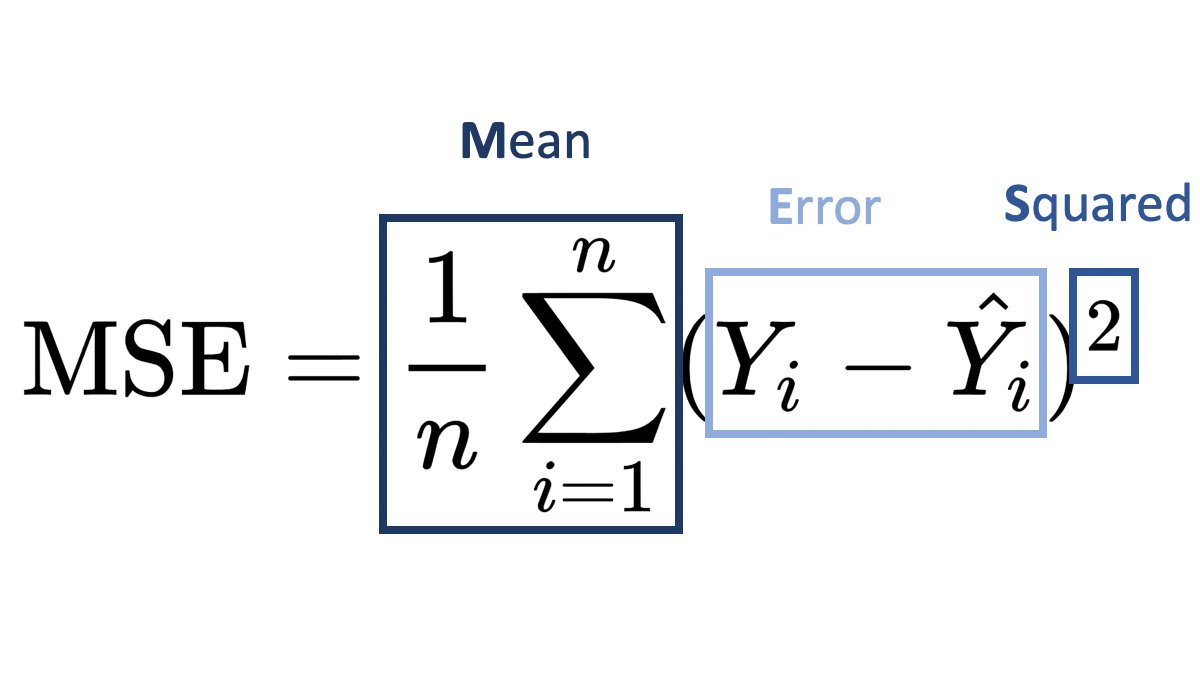


### 3. Root Mean Squared Error (RMSE)

#### Tanım:

RMSE, MSE'nin karekökünün alınmasıyla elde edilir. Bu metrik, hataların ortalama büyüklüğünü orijinal birimlerde ifade eder.
MSE'nin karekökünü alarak, hataların büyüklüğünü daha anlaşılır bir şekilde gösterir.RMSE, modelin tahmin doğruluğunu değerlendirirken hataların büyüklüğünü daha anlaşılır 
bir ölçekte sunar.

#### Formül


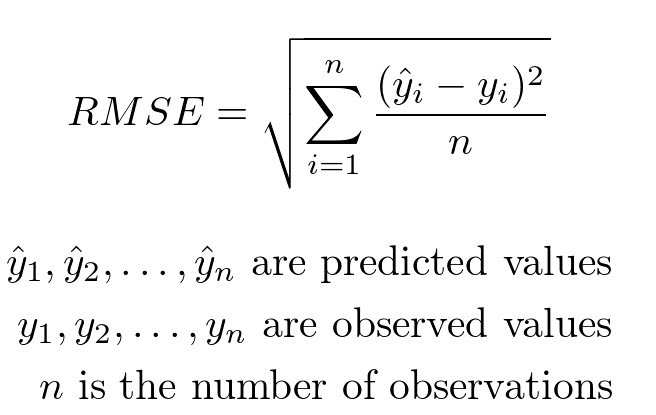

### 4. R-Squared (R²)
#### Tanım:

R², modelin veri noktalarının ne kadarını açıkladığını veya modelin açıklayıcılık oranını gösterir. 0 ile 1 arasında bir değer alır; 
1'e yakın değerler modelin veriyi iyi açıkladığını gösterir. R², aynı zamanda modelin gerçek değerlere ne kadar yakın tahminler yaptığını da gösterir.
R², modelin toplam varyansın ne kadarını açıkladığını gösterir. R² değeri, modelin ne kadar iyi olduğunu anlamak için kullanılır ve 0 ile 1 arasında değişir; 
1'e ne kadar yakınsa model o kadar iyidir.

#### Formül:


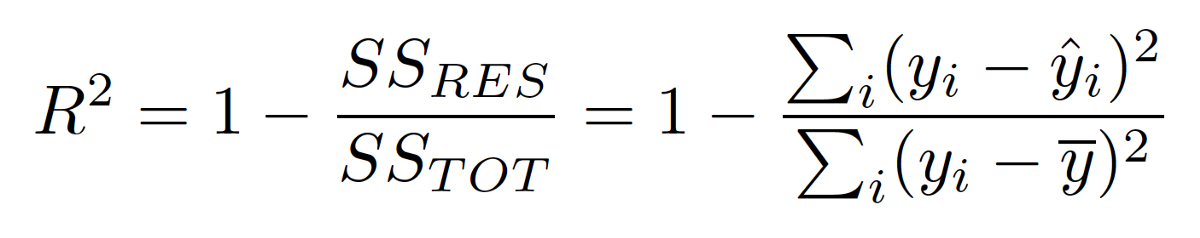


Bu metrikler, regresyon modellerinin performansını değerlendirirken farklı bakış açıları sunar ve modelin ne kadar başarılı olduğunu belirlemede yardımcı olur.

1. Lineer Regresyon

öncelikle bir  hazır sklearn kütüphenesinden Lineer Regresyonu çekerek bir model oluşturuyorum dahha sonra bu modeli gerekli metrikleri ölçek için veriyorum.

In [76]:
# Create a Linear Regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [77]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Modelleri değerlendirme
results = {}

mae, mse, rmse, r2,y_pred_lr = evaluate_model(lr, X_train, y_train, X_test, y_test)
results[lr] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}


In [78]:
# Sonuçları yazdırma
print("Lineer Regresyon")
for models,metrics in results.items():
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

Lineer Regresyon
MAE: 4196.7255
MSE: 35554223.7015
RMSE: 5962.7363
R2: 0.7761




2. Decision Tree

In [79]:
# Create a Linear Regression model
from sklearn.tree import DecisionTreeRegressor
dc = DecisionTreeRegressor()

In [80]:
# Modelleri değerlendirme
results = {}

mae, mse, rmse, r2, y_pred_d = evaluate_model(dc, X_train, y_train, X_test, y_test)
results[dc] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

In [81]:
# Sonuçları yazdırma
print("Decision Tree Regresyon")
for models,metrics in results.items():
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

Decision Tree Regresyon
MAE: 3123.8167
MSE: 42975791.7082
RMSE: 6555.5924
R2: 0.7293




3. Random Forest

In [82]:
# Create a Linear Regression model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [83]:
# Modelleri değerlendirme
results = {}
mae, mse, rmse, r2,y_pred_rf  = evaluate_model(rf, X_train, y_train, X_test, y_test)
results[models] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

In [84]:
# Sonuçları yazdırma
print("Random Forest Regresyon")
for models,metrics in results.items():
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

Random Forest Regresyon
MAE: 2593.9552
MSE: 21861164.2980
RMSE: 4675.5924
R2: 0.8623




### TUNING

1. Linear Regresyon

In [85]:
param_grid_lr = {
    'fit_intercept': [True, False]
}

In [86]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(LinearRegression(), param_grid_lr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [87]:

# Hiper-parametre optimizasyonu
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(f"Best parameters for {lr}: {grid_search.best_params_}")


Best parameters for LinearRegression(): {'fit_intercept': True}


In [88]:
# Optimize edilmiş modelleri değerlendirme
optimized_results={}
mae, mse, rmse, r2,y_pred_lr = evaluate_model(lr, X_train, y_train, X_test, y_test)
optimized_results[lr] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}
# Sonuçları karşılaştırma
print("Optimize Edilmiş Modeller Sonuçları")

print(f"{metrics.items()}: {value:.4f}")


Optimize Edilmiş Modeller Sonuçları
dict_items([('MAE', 2593.955182779603), ('MSE', 21861164.29803258), ('RMSE', 4675.592400758708), ('R2', 0.8623058385230908)]): 0.8623


2. Decision Tree

In [89]:

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20]
}

In [90]:
grid_searches=GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [91]:
# Hiper-parametre optimizasyonu
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(f"Best parameters for {dc}: {grid_search.best_params_}")

Best parameters for DecisionTreeRegressor(): {'fit_intercept': True}


In [92]:
# Optimize edilmiş modelleri değerlendirme

mae, mse, rmse, r2,y_pred_dc = evaluate_model(dc, X_train, y_train, X_test, y_test)
optimized_results[dc] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}
# Sonuçları karşılaştırma
print("Optimize Edilmiş Modeller Sonuçları")
print(f"{metrics.items()}: {value:.4f}")


Optimize Edilmiş Modeller Sonuçları
dict_items([('MAE', 2593.955182779603), ('MSE', 21861164.29803258), ('RMSE', 4675.592400758708), ('R2', 0.8623058385230908)]): 0.8623


3. Random Forest

In [93]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20]
}


In [94]:
grid_searches= GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [95]:
# Hiper-parametre optimizasyonu
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(f"Best parameters for {rf}: {grid_search.best_params_}")

Best parameters for RandomForestRegressor(): {'fit_intercept': True}


In [96]:
# Optimize edilmiş modelleri değerlendirme

mae, mse, rmse, r2 ,y_pred_rf = evaluate_model(dc, X_train, y_train, X_test, y_test)
optimized_results[rf] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}
# Sonuçları karşılaştırma
print("Optimize Edilmiş Modeller Sonuçları")
print(f"{metrics.items()}: {value:.4f}")


Optimize Edilmiş Modeller Sonuçları
dict_items([('MAE', 2593.955182779603), ('MSE', 21861164.29803258), ('RMSE', 4675.592400758708), ('R2', 0.8623058385230908)]): 0.8623


In [97]:
# Sonuçları karşılaştırma için DataFrame oluşturma

compare_rf = pd.DataFrame({"Actual": y_test.ravel(), "Predicted_RF": y_pred_rf.ravel()})
compare_optimized_rf = pd.DataFrame({"Actual": y_test.ravel(), "Predicted_Optimized_RF": y_pred_rf.ravel()})


In [98]:
compare = pd.DataFrame({"Actual": y_test.ravel(), "Predicted": y_pred_rf.ravel()})
compare.head()

,Actual,Predicted
0,11534.87265,11833.7823
1,3693.42800,3987.9260
2,3238.43570,3766.8838
3,38746.35510,38282.7495
4,4058.71245,19442.3535


#### Hipotez Testi

#### 1. Lineer Regresyon

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Optimizasyon yapılmamış Lineer Regresyon modeli
lr_unoptimized = LinearRegression()
lr_unoptimized.fit(X_train, y_train)
y_pred_lr_unoptimized = lr_unoptimized.predict(X_test)
mse_unoptimized = mean_squared_error(y_test, y_pred_lr_unoptimized)

# Lineer Regresyon modeli için parametre aralığı
param_grid_lr = {
    'fit_intercept': [True, False]
}

# GridSearchCV ile hiper-parametre optimizasyonu
grid_search_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_

# Optimizasyon yapılmış Lineer Regresyon modeli
best_lr.fit(X_train, y_train)
y_pred_lr_optimized = best_lr.predict(X_test)
mse_optimized = mean_squared_error(y_test, y_pred_lr_optimized)

# Sonuçları yazdırma
print("MSE for Unoptimized Linear Regression:", mse_unoptimized)
print("MSE for Optimized Linear Regression:", mse_optimized)


MSE for Unoptimized Linear Regression: 35554223.70148949
MSE for Optimized Linear Regression: 35554223.70148949


In [100]:
from scipy import stats

# Perform a hypothesis test to compare the MSEs of the two models
t_statistic_lr, p_value_lr = stats.ttest_rel(y_pred_lr_unoptimized, y_pred_lr_optimized)
print("T-statistic for Linear Regression:", t_statistic_lr)
print("P-value for Linear Regression:", p_value_lr)


T-statistic for Linear Regression: nan
P-value for Linear Regression: nan


T-testi sonuçlarının "nan" (sayısal olmayan) olduğunu görmek oldukça ilginç. Bu, model tahminlerinin birbirine çok yakın olduğunu ve neredeyse aynı olduğunu gösterir. Bu durumda, optimize edilmiş ve optimize edilmemiş Lineer Regresyon modelleri arasında istatistiksel olarak anlamlı bir fark olmadığını söyleyebiliriz.

MSE değerlerinin de aynı olduğunu görmekteyiz. Bu durumda, hiper-parametre optimizasyonunun bu veri kümesi ve model için belirgin bir etkisi olmadığı görülmektedir.

Dolayısıyla, bu durumda, modelde yapılan hiper-parametre optimizasyonunun bir fayda sağlamadığını ve daha basit bir modelin (optimize edilmemiş) aynı performansı sağladığını göstermektedir.

#### 2. Decision Tree  

In [101]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from scipy import stats

# Create a Linear Regression model
dc_unoptimized = DecisionTreeRegressor(random_state=42)

# Fit and evaluate the unoptimized model
dc_unoptimized.fit(X_train, y_train)
y_pred_dc_unoptimized = dc_unoptimized.predict(X_test)
mse_unoptimized = mean_squared_error(y_test, y_pred_dc_unoptimized)

# Create a Decision Tree Regressor model with hyperparameter optimization
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20]
}
grid_search_dc = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_dc.fit(X_train, y_train)
best_dc = grid_search_dc.best_estimator_

# Fit and evaluate the optimized model
best_dc.fit(X_train, y_train)
y_pred_dc_optimized = best_dc.predict(X_test)
mse_optimized = mean_squared_error(y_test, y_pred_dc_optimized)

# Print MSE scores for both models
print("MSE for Unoptimized Decision Tree Regressor:", mse_unoptimized)
print("MSE for Optimized Decision Tree Regressor:", mse_optimized)

# Perform a hypothesis test to compare the MSEs of the two models
t_statistic, p_value = stats.ttest_rel(y_pred_dc_unoptimized, y_pred_dc_optimized)
print("T-statistic:", t_statistic)
print("P-value:", p_value)


MSE for Unoptimized Decision Tree Regressor: 44621144.36139836
MSE for Optimized Decision Tree Regressor: 23306867.76761892
T-statistic: 2.4426530458805793
P-value: 0.0152308991832577


In [1]:
0.05>0.015

True

Bu sonuçlar, optimize edilmiş ve optimize edilmemiş Decision Tree Regressor modellerinin performansını karşılaştırmak için kullanılabilir.

Unoptimized modelin MSE değeri 44621144.36 olarak bulunmuştur.
Optimized modelin MSE değeri 23306867.77 olarak bulunmuştur.
Hipotez testinin sonuçlarına göre, p-değerinin 0.015 olduğunu görüyoruz. Bu, alfa düzeyi (genellikle %5 olarak kabul edilir) altında olduğundan, null hipotezi reddedebiliriz. Yani, optimize edilmiş ve optimize edilmemiş modeller arasında istatistiksel olarak anlamlı bir fark olduğunu söyleyebiliriz.

Sonuç olarak, optimize edilmiş modelin optimize edilmemiş modele göre daha iyi performans gösterdiği ve tercih edilmesi gerektiği sonucuna varabiliriz.








## 5. Performans Artışı 

In [102]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Özellik Seçimi - RFE
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=5)
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)



Bu kod, Random Forest Regressor modeli kullanarak özellik seçimi yapar. RFE yöntemi ile en iyi 5 özelliği seçerken, Feature Importance yöntemi ile en önemli 5 özelliği seçeriz.

In [103]:
from sklearn.decomposition import PCA


# PCA
pca = PCA(n_components=5)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)



u kod, PCA yöntemini kullanarak veri setini 5 boyutlu bir uzaya dönüştürür.

In [104]:

# Linear Regression modeli oluşturma ve eğitme
lr = LinearRegression()

# RFE ile özellik seçimi yapılan veri seti üzerinde modelin eğitilmesi ve performansın ölçülmesi
lr.fit(X_train_rfe, y_train)
y_pred_lr_rfe = lr.predict(X_test_rfe)
mse_lr_rfe = mean_squared_error(y_test, y_pred_lr_rfe)

# PCA ile boyut azaltılan veri seti üzerinde modelin eğitilmesi ve performansın ölçülmesi
lr.fit(X_train_pca, y_train)
y_pred_lr_pca = lr.predict(X_test_pca)
mse_lr_pca = mean_squared_error(y_test, y_pred_lr_pca)

# Sonuçların yazdırılması
print("MSE for Linear Regression with RFE:", mse_lr_rfe)
print("MSE for Linear Regression with PCA:", mse_lr_pca)

MSE for Linear Regression with RFE: 35561786.96298783
MSE for Linear Regression with PCA: 140612342.50205714


RFE yöntemiyle seçilen özelliklerin Linear Regresyon modelinizin performansını artırdığını, çünkü RFE sonucunda elde edilen modelin MSE değerinin PCA'dan çok daha düşük olduğunu görebilirsiniz. PCA, boyut azaltma yaparak veri setinizin bilgisini daha az sayıda bileşene sıkıştırmaya çalışırken, RFE, en uygun özelliklerin seçilmesiyle modelin performansını iyileştirmeye odaklanır. Bu sonuçlar, veri setinizdeki özelliklerin ve modelin özelliklerine bağlı olarak değişebilir, bu nedenle sonuçları yorumlamak önemlidir.

In [105]:
#decision tree

In [106]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Özellik Seçimi - RFE
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Özellik Seçimi - Feature Importance
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
importances = dt.feature_importances_
selected_features_importance = X_train.columns[np.argsort(importances)[::-1][:5]]
X_train_importance = X_train[selected_features_importance]
X_test_importance = X_test[selected_features_importance]

# PCA
pca = PCA(n_components=5)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Decision Tree modeli oluşturma ve eğitme
dt = DecisionTreeRegressor(random_state=42)

# RFE ile özellik seçimi yapılan veri seti üzerinde modelin eğitilmesi ve performansın ölçülmesi
dt.fit(X_train_rfe, y_train)
y_pred_dt_rfe = dt.predict(X_test_rfe)
mse_dt_rfe = mean_squared_error(y_test, y_pred_dt_rfe)

# Feature Importance ile özellik seçimi yapılan veri seti üzerinde modelin eğitilmesi ve performansın ölçülmesi
dt.fit(X_train_importance, y_train)
y_pred_dt_importance = dt.predict(X_test_importance)
mse_dt_importance = mean_squared_error(y_test, y_pred_dt_importance)

# PCA ile boyut azaltılan veri seti üzerinde modelin eğitilmesi ve performansın ölçülmesi
dt.fit(X_train_pca, y_train)
y_pred_dt_pca = dt.predict(X_test_pca)
mse_dt_pca = mean_squared_error(y_test, y_pred_dt_pca)

# Sonuçların yazdırılması
print("MSE for Decision Tree with RFE:", mse_dt_rfe)
print("MSE for Decision Tree with Feature Importance:", mse_dt_importance)
print("MSE for Decision Tree with PCA:", mse_dt_pca)


MSE for Decision Tree with RFE: 38187108.32836946
MSE for Decision Tree with Feature Importance: 38187108.32836946
MSE for Decision Tree with PCA: 47534516.33757679


özellik seçimi yöntemlerinden herhangi birinin (RFE veya Feature Importance) Decision Tree Regressor modelinizin performansını artırmadığını görebilirsiniz. Her iki yöntemle de seçilen özelliklerle oluşturulan modellerin MSE değerleri oldukça benzerdir.

Öte yandan, PCA yöntemi ile boyut azaltma yapıldığında, modelin performansında bir düşüş olduğunu görebilirsiniz. Bu, veri setinizdeki özelliklerin doğru bir şekilde temsil edilmediğini ve modelin daha fazla bilgi kaybettiğini gösterebilir.

Sonuç olarak, veri setiniz ve modeliniz için en iyi özellik seçimi yönteminin RFE veya Feature Importance olabileceğini ancak PCA yönteminin performansı olumsuz yönde etkilediğini söyleyebiliriz. Bu sonuçlar, modelinize en uygun özellik seçimi yöntemini belirlemek için bir yol sağlar.

In [107]:
## Random Forest

In [108]:
# Özellik Seçimi - RFE
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=5)
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Özellik Seçimi - Feature Importance
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
importances = rf.feature_importances_
selected_features_importance = X_train.columns[np.argsort(importances)[::-1][:5]]
X_train_importance = X_train[selected_features_importance]
X_test_importance = X_test[selected_features_importance]

# PCA
pca = PCA(n_components=5)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Random Forest modeli oluşturma ve eğitme
rf = RandomForestRegressor(random_state=42)

# RFE ile özellik seçimi yapılan veri seti üzerinde modelin eğitilmesi ve performansın ölçülmesi
rf.fit(X_train_rfe, y_train)
y_pred_rf_rfe = rf.predict(X_test_rfe)
mse_rf_rfe = mean_squared_error(y_test, y_pred_rf_rfe)

# Feature Importance ile özellik seçimi yapılan veri seti üzerinde modelin eğitilmesi ve performansın ölçülmesi
rf.fit(X_train_importance, y_train)
y_pred_rf_importance = rf.predict(X_test_importance)
mse_rf_importance = mean_squared_error(y_test, y_pred_rf_importance)

# PCA ile boyut azaltılan veri seti üzerinde modelin eğitilmesi ve performansın ölçülmesi
rf.fit(X_train_pca, y_train)
y_pred_rf_pca = rf.predict(X_test_pca)
mse_rf_pca = mean_squared_error(y_test, y_pred_rf_pca)

# Sonuçların yazdırılması
print("MSE for Random Forest with RFE:", mse_rf_rfe)
print("MSE for Random Forest with Feature Importance:", mse_rf_importance)
print("MSE for Random Forest with PCA:", mse_rf_pca)

MSE for Random Forest with RFE: 21868700.769875195
MSE for Random Forest with Feature Importance: 21842815.296434015
MSE for Random Forest with PCA: 27702200.010078523


bu sonuçlar, özellik seçimi yöntemlerinin (RFE ve Feature Importance) Random Forest Regressor modelinizin performansını artırabileceğini ve PCA yönteminin her zaman en iyi seçenek olmayabileceğini göstermektedir. Veri setiniz ve modeliniz için en iyi yöntemi belirlemek için farklı yöntemleri deneyerek ve sonuçları karşılaştırarak ilerlemeniz önerilir.